In [1]:
#Example From:
#https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817

In [2]:
#Required Imports 

import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable

In [3]:
# create dummy data for training

x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [4]:
#Defining the model architecture

class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [5]:
#Create the parameters for the model

inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100        #Number of iterations the algorithm will run through

model = linearRegression(inputDim, outputDim)
#Makes use of the GPU if you have one available
if torch.cuda.is_available():
    model.cuda()

In [6]:
#Then we initialize the loss function and the optimizer

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [7]:
#Training of the Model

for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():                 #Uses GPU if available
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(136.9714, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 0, loss 136.971435546875
tensor(11.1781, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 1, loss 11.178140640258789
tensor(0.9175, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 2, loss 0.9175172448158264
tensor(0.0805, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 3, loss 0.08052688837051392
tensor(0.0122, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 4, loss 0.01219265442341566
tensor(0.0066, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 5, loss 0.0065561337396502495
tensor(0.0060, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 6, loss 0.006034263875335455
tensor(0.0059, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 7, loss 0.005930277053266764
tensor(0.0059, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 8, loss 0.0058610690757632256
tensor(0.0058, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 9, loss 0.005795388948172331
tensor(0.0057, device='cuda:0', grad_fn=<MseLossBackward>)
epoch 

[[ 1.0854349]
 [ 3.0731316]
 [ 5.060828 ]
 [ 7.0485244]
 [ 9.036221 ]
 [11.023917 ]
 [13.011614 ]
 [14.9993105]
 [16.987007 ]
 [18.974703 ]
 [20.9624   ]]


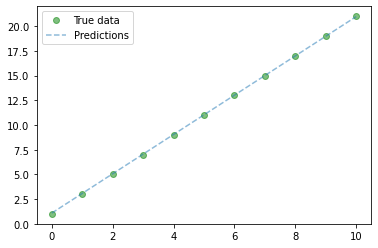

In [8]:
#Testing the Model and Plotting

with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()